In [300]:
#Observations:
# 1) Capomulin and Ramicane seem to be the two drug regimens that appear to have been tested more
# 2) Final tumor volumes from Capomulin and Ramicane are smaller than Infubinol and Ceftamin
# 3) For mouse i557 the first few days it seemed that the treatment was working as the tumor volume was getting smaller

In [301]:
#!pip install Matplotlib
#!Pip install scipy

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
#Creating names for files to read in to
file_1 = "Resources/Mouse_metadata.csv"
file_2 = "Resources/Study_results.csv"
#Redaing into files
mouse_df = pd.read_csv(file_1)
results_df = pd.read_csv(file_2)
#Merging files together on "Mouse ID"
merged_df = pd.merge(results_df, mouse_df, on="Mouse ID", how="left")
#Printing first five in df
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [303]:
#Counting unique "Mouse ID's"
mouse_count = len(merged_df['Mouse ID'].unique())
#Printing mouse count
mouse_count

249

In [304]:
#Locating all duplicate entries based on "Mouse ID" and "Timepoint"
duplicates = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'],keep=False)]
#Printing all duplicate data found
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [305]:
#Locating all data for mouse g989
data_g989 = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
#Printing all mouse data for g989
data_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [306]:
#Creating copy of the merged_df
new_merg_df = merged_df.copy()
#Taking out data of mouse g989
new_merg_df.drop(new_merg_df[new_merg_df['Mouse ID'] == 'g989'].index, inplace = True) 
#Printing first five of new df
new_merg_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [322]:
#Finding the number of mice in new df
new_m_count = len(new_merg_df['Mouse ID'].unique())
#Printing new mouse count
new_m_count

248

In [308]:
#Creting a copy of new_merg_df
d_reg_df = new_merg_df.copy()
#Grouping d_reg_df by 'Drug Regimen' and finding the mean of 'Tumor Volume(mm3)'
mean = d_reg_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
#Grouping d_reg_df by 'Drug Regimen' and finding the median of 'Tumor Volume(mm3)'
median = d_reg_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
#Grouping d_reg_df by 'Drug Regimen' and finding the variance of 'Tumor Volume(mm3)'
variance = d_reg_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
#Grouping d_reg_df by 'Drug Regimen' and finding the standard deviation of 'Tumor Volume(mm3)'
s_deviation = d_reg_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
#Grouping d_reg_df by 'Drug Regimen' and finding the sem of 'Tumor Volume(mm3)'
sem = d_reg_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
#Putting all finding into a df
sum_table_df = pd.DataFrame({"Mean Tumor Volume": mean,
                            "Median Tumor Volume": median,
                            "Tumor Volume Variance": variance,
                            "Tumor Volume Std. Dev.": s_deviation,
                            "Tumor Volume Std. Err.": sem})
#Printing df
sum_table_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [321]:
#Grouping new_merg_df by "Drug Regimen", then .agg into 'Tumor Volume (mm3)' column to find mean, median, variance, standard, deviatoin and sem
drug_df = new_merg_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
#Printing df
drug_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0, 0.5, 'Number of Data Points')

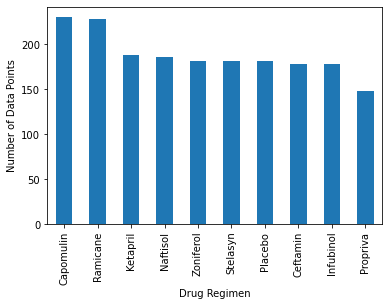

In [310]:
#Finding the number of mice for each 'Drug Regimen'
mice_per_treatment = new_merg_df["Drug Regimen"].value_counts()
#Creaitng bar graph
mice_per_treatment.plot(kind = 'bar')
#Adding x and y labels to chart
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

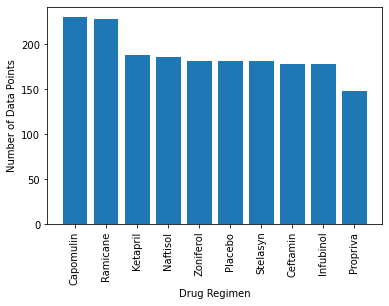

In [311]:
#Finding the number of mice for each 'Drug Regimen'
mice_treatment_2 = new_merg_df["Drug Regimen"].value_counts()
#Getting values for x-axis 
x_axis = np.arange(len(mice_treatment_2))
#Creating labels for xticks
x = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
x_pos = [i for i, _ in enumerate(x)]
#Creating bar chart
plt.bar(x_axis, mice_treatment_2)
#Setting xticks
plt.xticks(x_pos, x, rotation = 90)
#Adding x and y labels to chart
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
#Showing bar chart
plt.show()

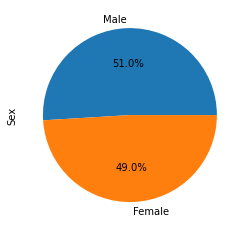

In [312]:
#Create df counting the number of mice per each sex
mice_sex = new_merg_df["Sex"].value_counts()
#Creating labels
labels = ["Male", "Female"]
#Creating pie chart and specifications
mice_sex.plot(kind = 'pie', autopct="%1.1f%%")

Text(0.5, 1.0, 'Sex')

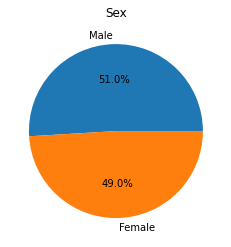

In [313]:
#Create df counting the number of mice per each sex
mice_sex = new_merg_df["Sex"].value_counts()
#Creating labels
labels = ["Male", "Female"]
#Creating pie chart and specifications
plt.pie(mice_sex, labels=labels, autopct="%1.1f%%")
#Adding title
plt.title('Sex')

In [314]:
#Grouping new_merg_df by 'Mouse ID' and finding the max for eacah column
m_id = new_merg_df.groupby (['Mouse ID']).max()
#Resetting index in order to make 'Mouse ID' column again
mouse_time = m_id.reset_index()
#Deleting columns from df that we do not need, leaving only 'Mouse ID' and 'Timepoint' in the df
mouse_time = mouse_time.drop(columns=['Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'])
#Creating new df merging mouse_time df into new_merg_df 
adjusted_df = pd.merge(mouse_time, new_merg_df, on=["Mouse ID", "Timepoint"], how="left")
#Showing first five rows of new_df
adjusted_df. head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [315]:
#Creating list of regimens that we want to specifically look at
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#Creating empyt list for tumor volume data
tumor_vol = []
#Creating for loop to look into adjusted df and pull out 'Tumor Volume (mm3)' column for each regimen
for regimen in regimen_list:
    final_tumor_vol = adjusted_df.loc[new_df["Drug Regimen"] == regimen, 'Tumor Volume (mm3)']
    #adding subset
    tumor_vol.append(final_tumor_vol)
#Setting quartiles for the final_tumor_vol df
quartiles = final_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
#Finding interquartile range
iqr = upperq-lowerq
#Setting lower and upper bounds to help in finding potential outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

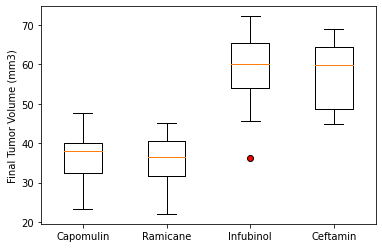

In [316]:
#Using the variable ax for single axes
fig1, ax1 = plt.subplots()
#Adding y label
ax1.set_ylabel('Final Tumor Volume (mm3)')
#Creating labels for x-axis
labels = regimen_list
#Formatting outliers
flierprops = dict(marker='o', markerfacecolor='r')
#Setting specifics for boxplot
ax1.boxplot(tumor_vol, labels = regimen_list, flierprops=flierprops)
#Showing boxplot
plt.show()

In [317]:
#Finding all mice that received drug regimen "Capomulin"
capo_mice = new_merg_df.loc[new_merg_df["Drug Regimen"] == "Capomulin",:]
#Selected mouse i557 from df above, locating all data for i557
mouse_data = new_merg_df.loc[new_merg_df["Mouse ID"] == "i557", :]
#Printing all mouse data for i557
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
246,i557,0,45.000000,0,Capomulin,Female,1,24
365,i557,5,42.261665,0,Capomulin,Female,1,24
574,i557,10,42.992077,0,Capomulin,Female,1,24
860,i557,15,43.529876,0,Capomulin,Female,1,24
1052,i557,20,43.967895,0,Capomulin,Female,1,24
1157,i557,25,44.596219,0,Capomulin,Female,1,24
1309,i557,30,45.261384,0,Capomulin,Female,1,24
1573,i557,35,45.941949,0,Capomulin,Female,1,24
1712,i557,40,46.821070,1,Capomulin,Female,1,24
1878,i557,45,47.685963,1,Capomulin,Female,1,24


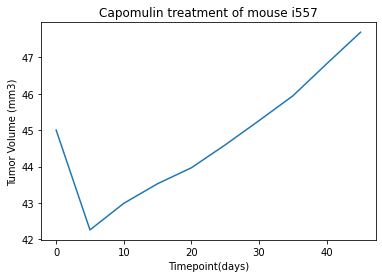

In [318]:
#Getting all data for column 'Timepoint' for mouse i557
time = mouse_data["Timepoint"]
#Getting all data for column 'Tumor Volume (mm3)' for mouse i557
tumor_v = mouse_data["Tumor Volume (mm3)"]
#Creating line plot of 'time' and 'tumor_v'
plt.plot(time, tumor_v)
#Adding x and y labels
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
#Adding line plot title
plt.title("Capomulin treatment of mouse i557")
#Showing line plot
plt.show()

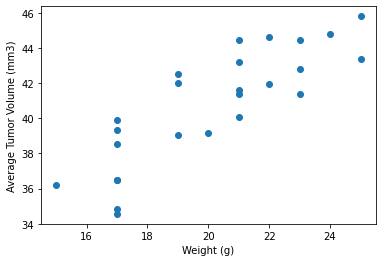

In [319]:
#Grouping capo_mice df by 'Mouse ID' and finding the average of the df
capo_avg = capo_mice.groupby(['Mouse ID']).mean()
#Creaitng scatter plot of 'Weight(g)' and 'Tumor Volume(mm3)' from capo average df
plt.scatter(capo_avg['Weight (g)'],capo_avg['Tumor Volume (mm3)'])
#adding x and y labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#Showing scatter plot
plt.show()

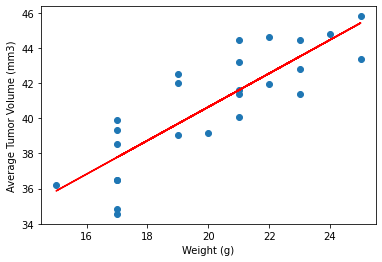

The correlation between mouse weight and the average tumor volume is 0.84


In [320]:
#Finding correlation of 'Weight(g)' and 'Tumor Volume(mm3)' in the capo average df, formatting to round to 2 decimal places
correlation = round(st.pearsonr(capo_avg['Weight (g)'], capo_avg['Tumor Volume (mm3)'])[0],2)
#Fidning regression line of 'Weight(g)' and 'Tumor Volume(mm3)' in the capo average df
model = st.linregress(capo_avg['Weight (g)'], capo_avg['Tumor Volume (mm3)'])
#Finding y-values
y_values = capo_avg['Weight (g)']*model[0]+model[1]
#Creaitng scatter plot of 'Weight(g)' and 'Tumor Volume(mm3)' from capo average df
plt.scatter(capo_avg['Weight (g)'],capo_avg['Tumor Volume (mm3)'])
#Plotting the 'Weight (g)' from capo_avg, y-values and setting the color to red
plt.plot(capo_avg['Weight (g)'],y_values,color="red")
#Adding x and y labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#Showing scatter plot and regression line
plt.show()
#Print statement for correlation 
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")